## 🧡Implementación KNN 

KNN es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.

Funcionamiento:
- Calcular la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.
- Seleccionar los “k” elementos más cercanos (con menor distancia, según la función que se use)
- Realizar una “votación de mayoría” entre los k puntos: los de una clase/etiqueta que <<dominen>> decidirán su clasificación final

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1,10,100)
y = x**2 + x**4 - x**6/20000 + 4*np.log(x)  + 1000*np.random.rand(100)

In [3]:
def RegressionKNN(x_new, x, y, k = 5):
    h = np.zeros(shape = x_new.shape)
    for i in range(len(x_new)):
        indvecinoscercanos = np.argsort(np.abs(x_new[i] - x))[:k]
        h[i] = np.mean(y[indvecinoscercanos])
    
    return h

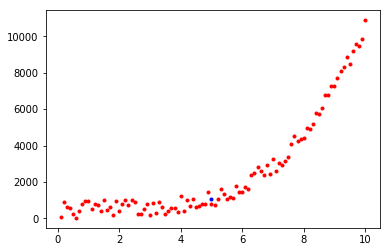

In [4]:
plt.plot(x, y, '.r')
plt.plot(np.array([5]), RegressionKNN(np.array([5]), x , y, k = 20), '.b')

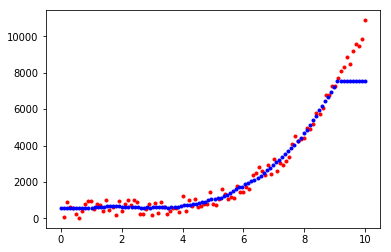

In [5]:
plt.plot(x, y, '.r')
plt.plot(np.linspace(0,10,100), RegressionKNN(np.linspace(0,10,100), x , y, k = 20), '.b')

## 💙Creando nuestro propio KNN

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
from matplotlib import style

In [10]:
import warnings

In [11]:
from math import sqrt

In [13]:
from collections import Counter

In [20]:
#Dataser manuel y el punto que quiero clasificar es [5,7]

dataset ={
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}

new_point = [5,7]

In [19]:
dataset

{'k': [[1, 2], [2, 3], [3, 1]], 'r': [[6, 5], [7, 7], [8, 6]]}

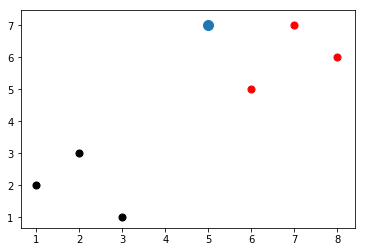

In [27]:
[[plt.scatter(ii[0],ii[1], s =50, color =i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100)

In [39]:
def k_nearest_neighbors(data, predict, k=3):
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el numero total de elementos a votar")
    
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt((feature[0] - predict[0])** 2 + (feature[1] - predict[1])** 2)
            #d = np.sqrt(np.sum((np.array(feature)- np.arary(predict))**2))
            d = np.linalg.norm(np.array(feature)-np.array(predict))
            distances.append([d,group])
    print(distances)
    votes= [i[1] for i in sorted(distances)[:k]] # sorted ordena por la primera columna
    print(votes)
    
    vote_result = Counter(votes).most_common(1)
    print(vote_result)
    return vote_result

In [40]:
result = k_nearest_neighbors(dataset, new_point)
result

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']
[('r', 3)]


[('r', 3)]

In [58]:
type(result)

list

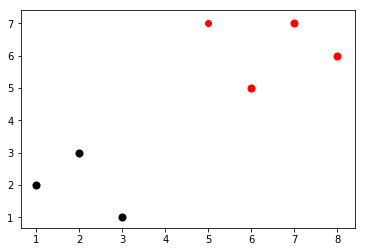

In [51]:
[[plt.scatter(ii[0],ii[1], s =50, color =i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], color = 'r')